# INTERRATER RELIABILITY NOTEBOOK

Create a jupyter notebook to check inter-rater reliability (IRR) for character screen time coding.

import libraries

In [65]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

Sophia data cleaning per episodes

In [67]:
sophia_data = pd.read_csv(
    "C:/Users/dalia/OneDrive/CHARACTER TIME OC/SOPHIA -character_time_stamps.csv")
sophia_data['Source'] = 'Sophia'
sophia_data.head()

,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length,Good_clip,Source
0,1.0,1.0,0:45:08,Ryan,0:45:08,0:33:02,0.0,726.0,726.0,0.0,Sophia
1,1.0,1.0,0:45:08,Sandy,0:43:42,0:40:29,86.0,279.0,193.0,NaN,Sophia
2,1.0,1.0,0:45:08,Sandy,0:38:47,0:36:28,381.0,520.0,139.0,NaN,Sophia
3,1.0,1.0,0:45:08,Kirsten,0:37:36,0:36:28,452.0,520.0,68.0,NaN,Sophia
4,1.0,1.0,0:45:08,Marissa,0:36:20,0:33:54,528.0,674.0,146.0,NaN,Sophia


In [68]:
sophia_data = sophia_data.drop('Good_clip', axis =1)
sophia_data.drop(sophia_data.index[81:], inplace=True)
sophia_data.loc[74:80] = sophia_data.loc[74:80].fillna({'Season':1})

sophia_data.head()

char_list = sophia_data['Character'].unique()

sophia_data_ep1 = sophia_data[sophia_data['Episode'] == 1]

sophia_data_ep1.head()


,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length,Source
0,1.0,1.0,0:45:08,Ryan,0:45:08,0:33:02,0.0,726.0,726.0,Sophia
1,1.0,1.0,0:45:08,Sandy,0:43:42,0:40:29,86.0,279.0,193.0,Sophia
2,1.0,1.0,0:45:08,Sandy,0:38:47,0:36:28,381.0,520.0,139.0,Sophia
3,1.0,1.0,0:45:08,Kirsten,0:37:36,0:36:28,452.0,520.0,68.0,Sophia
4,1.0,1.0,0:45:08,Marissa,0:36:20,0:33:54,528.0,674.0,146.0,Sophia


Zach data clearning per epsidos 

In [70]:
zach_data = pd.read_csv(
    "C:/Users/dalia/OneDrive/CHARACTER TIME OC/ZACH- character_time_stamps.csv")
zach_data['Source'] = 'Zach'
zach_data.head()


,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length,Good_clip,Source
0,1.0,1.0,0:45:08,Ryan,0:45:08,0:29:42,0.0,926.0,926.0,NaN,Zach
1,1.0,1.0,0:45:08,Sandy,0:43:41,0:40:27,87.0,281.0,194.0,NaN,Zach
2,1.0,1.0,0:45:08,Sandy,0:38:48,0:36:27,380.0,521.0,141.0,NaN,Zach
3,1.0,1.0,0:45:08,Kirsten,0:37:28,0:36:27,460.0,521.0,61.0,NaN,Zach
4,1.0,1.0,0:45:08,Marissa,0:36:24,0:33:54,524.0,674.0,150.0,NaN,Zach


In [71]:
zach_data = zach_data.drop(63)
zach_data.drop(zach_data.index[154:], inplace = True)
zach_data.head()


zach_data = zach_data.drop('Good_clip', axis = 1)
zach_data['Source'] = 'Zach'
zach_data = zach_data.replace(to_replace="Marissa ", value="Marissa")


zach_data_ep1 = zach_data[zach_data['Episode'] == 1]
zach_data.head()

,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length,Source
0,1.0,1.0,0:45:08,Ryan,0:45:08,0:29:42,0.0,926.0,926.0,Zach
1,1.0,1.0,0:45:08,Sandy,0:43:41,0:40:27,87.0,281.0,194.0,Zach
2,1.0,1.0,0:45:08,Sandy,0:38:48,0:36:27,380.0,521.0,141.0,Zach
3,1.0,1.0,0:45:08,Kirsten,0:37:28,0:36:27,460.0,521.0,61.0,Zach
4,1.0,1.0,0:45:08,Marissa,0:36:24,0:33:54,524.0,674.0,150.0,Zach


In [72]:
#merging datasets

mergedf = pd.merge(sophia_data, zach_data, how='outer')
mergedf.head()




#New DF for episode 1 bar plot 
ep_1_df = mergedf[mergedf['Episode']  <2]
print(ep_1_df)

character_seconds_source_df = pd.DataFrame(columns=["Character", "Seconds","Source"])
print(character_seconds_source_df)

     Season  Episode Episode_length Character Start_time End_time  \
0       1.0      1.0        0:45:08     Jimmy    0:16:51  0:15:36   
1       1.0      1.0        0:45:08     Jimmy    0:16:52  0:15:35   
2       1.0      1.0        0:45:08     Jimmy    0:21:22  0:20:16   
3       1.0      1.0        0:45:08     Jimmy    0:21:47  0:20:14   
4       1.0      1.0        0:45:08     Jimmy    0:26:11  0:26:04   
..      ...      ...            ...       ...        ...      ...   
131     1.0      1.0        0:45:08    Summer    0:21:58  0:21:49   
132     1.0      1.0        0:45:08    Summer    0:22:55  0:22:32   
133     1.0      1.0        0:45:08    Summer    0:22:56  0:20:49   
134     1.0      1.0        0:45:08    Summer    0:24:16  0:23:46   
135     1.0      1.0        0:45:08    Summer    0:24:16  0:23:58   

     Start_second  End_second  Clip_length  Source  
0          1697.0      1772.0         75.0    Zach  
1          1696.0      1773.0         77.0  Sophia  
2          1

zach work for screenitme data separate

In [74]:
ftr = [3600,60,1]

test = zach_data_ep1['Episode_length'][0]
zach_data_ep1.head()

zchar = zach_data_ep1['Character'].unique()
print(zchar)

z_total_epleng = sum([a*b for a,b in zip(ftr, map(int,test.split(':')))])

zach_screentime_ep1 = pd.DataFrame(columns = zchar, index = range(z_total_epleng))
zach_screentime_ep1.head()

for n_row in zach_data_ep1.index:
    temp_char = zach_data_ep1.loc[n_row,'Character']
    temp_start_idx= zach_data_ep1.loc[n_row, 'Start_second']
    temp_end_idx = zach_data_ep1.loc[n_row, 'End_second']
    zach_screentime_ep1.loc[temp_start_idx:temp_end_idx, temp_char] = 1

zach_screentime_ep1.fillna(0, inplace = True)

zach_screentime_ep1['Seconds'] = zach_screentime_ep1.index

zach_screentime_ep1['Rater'] = 'Zach'

zach_screentime_ep1.head()

['Ryan' 'Sandy' 'Kirsten' 'Marissa' 'Luke' 'Seth' 'Jimmy' 'Julie' 'Summer']


,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer,Seconds,Rater
0,1,0,0,0,0,0,0,0,0,0,Zach
1,1,0,0,0,0,0,0,0,0,1,Zach
2,1,0,0,0,0,0,0,0,0,2,Zach
3,1,0,0,0,0,0,0,0,0,3,Zach
4,1,0,0,0,0,0,0,0,0,4,Zach


Sophia SCreentime data from only 1 episode 

In [76]:
ftr = [3600,60,1]

test = sophia_data_ep1['Episode_length'][0]
print(test)

schar = sophia_data_ep1['Character'].unique()

print(schar)

s_total_epleng = sum([a*b for a,b in zip(ftr, map(int,test.split(':')))])

sophia_screentime_ep1 = pd.DataFrame(columns = schar, index = range(s_total_epleng))

print(sophia_screentime_ep1)

for n_row in sophia_data_ep1.index:
    temp_char = sophia_data_ep1.loc[n_row,'Character']
    temp_start_idx= sophia_data_ep1.loc[n_row, 'Start_second']
    temp_end_idx = sophia_data_ep1.loc[n_row, 'End_second']
    sophia_screentime_ep1.loc[temp_start_idx:temp_end_idx, temp_char] = 1

sophia_screentime_ep1.fillna(0, inplace = True)

sophia_screentime_ep1['Seconds'] = sophia_screentime_ep1.index

sophia_screentime_ep1['Rater'] = 'Sophia'


sophia_screentime_ep1.head()

0:45:08
['Ryan' 'Sandy' 'Kirsten' 'Marissa' 'Luke' 'Seth' 'Jimmy' 'Julie' 'Summer']
     Ryan Sandy Kirsten Marissa Luke Seth Jimmy Julie Summer
0     NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
1     NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
2     NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
3     NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
4     NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
...   ...   ...     ...     ...  ...  ...   ...   ...    ...
2703  NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
2704  NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
2705  NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
2706  NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN
2707  NaN   NaN     NaN     NaN  NaN  NaN   NaN   NaN    NaN

[2708 rows x 9 columns]


,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer,Seconds,Rater
0,1,0,0,0,0,0,0,0,0,0,Sophia
1,1,0,0,0,0,0,0,0,0,1,Sophia
2,1,0,0,0,0,0,0,0,0,2,Sophia
3,1,0,0,0,0,0,0,0,0,3,Sophia
4,1,0,0,0,0,0,0,0,0,4,Sophia


In [77]:
#merge sophia and zach datasets

ep1_screentime_data = pd.merge(sophia_screentime_ep1, 
                                zach_screentime_ep1, how='outer')

ep1_screentime_data.head()

sophia_screentime_ep1.isnull().values.any()



False

# Inter Rater Reliability Check starts here

In [79]:
from sklearn.metrics import cohen_kappa_score

ryan_zach = zach_screentime_ep1['Ryan']

#print(ryan_zach)

ryan_sophia = sophia_screentime_ep1['Ryan']

#print(ryan_sophia)

ryan_zach_sophia_score = cohen_kappa_score(ryan_zach.astype(str), ryan_sophia.astype(str))

print(ryan_zach_sophia_score)

#print(char_list)


#Update: Above code so far still giving error. Will continue to troubleshoot



0.82054179671462


Kappa Results Dataset for analysis 

In [135]:
kappa_results = pd.DataFrame(columns = char_list)



kappa_scores = []
for char in char_list: 
    temp_rater_list_zach = zach_screentime_ep1[char]
    temp_rater_list_sophia = sophia_screentime_ep1[char]
        
    temp_output1 = cohen_kappa_score(temp_rater_list_zach.astype(str), temp_rater_list_sophia.astype(str))
    print(f"Kappa for {char}: {temp_output1}") 
    kappa_scores.append({'Character': char, 'Kappa Score': temp_output1})

# Convert list to DataFrame
kappa_results = pd.DataFrame(kappa_scores)


# Print final DataFrame
print(kappa_results)

kappa_results = kappa_results.T.reset_index(drop = True)  # Transpose the DataFrame
  # Remove old index



#This df below gives us the cohen kappa interrater relability score for each of the characters between sophia and zach's dfs
kappa_results.head()
    

Kappa for Ryan: 0.82054179671462
Kappa for Sandy: 0.8953472925024818
Kappa for Kirsten: 0.9061561001200639
Kappa for Marissa: 0.7012576977559337
Kappa for Luke: 0.7952189336095401
Kappa for Seth: 0.8577568796787521
Kappa for Jimmy: 0.9003889162835828
Kappa for Julie: 0.8182336851643649
Kappa for Summer: 0.6089481935208396
  Character  Kappa Score
0      Ryan     0.820542
1     Sandy     0.895347
2   Kirsten     0.906156
3   Marissa     0.701258
4      Luke     0.795219
5      Seth     0.857757
6     Jimmy     0.900389
7     Julie     0.818234
8    Summer     0.608948


,0,1,2,3,4,5,6,7,8
0,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer
1,0.820542,0.895347,0.906156,0.701258,0.795219,0.857757,0.900389,0.818234,0.608948


Make a bar chart for the characters

    Character Kappa Score
0           0        Ryan
1           0    0.820542
2           1       Sandy
3           1    0.895347
4           2     Kirsten
5           2    0.906156
6           3     Marissa
7           3    0.701258
8           4        Luke
9           4    0.795219
10          5        Seth
11          5    0.857757
12          6       Jimmy
13          6    0.900389
14          7       Julie
15          7    0.818234
16          8      Summer
17          8    0.608948


ValueError: Axes(0.125,0.11;0.775x0.77) has no legend attached.

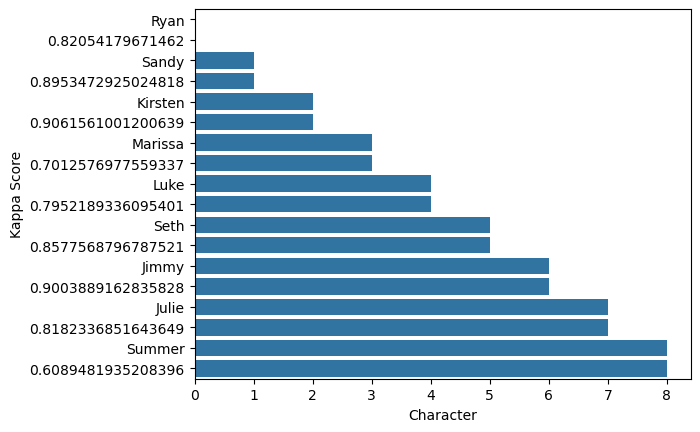

In [149]:
#this makes a new df I can use
kappa_results_bar = kappa_results

kappa_results_long = kappa_results.melt(var_name="Character", value_name="Kappa Score")
print(kappa_results_long)


kappa_results_bar = sns.barplot(data = kappa_results_long, x='Character', 
                                y='Kappa Score')

sns.move_legend(kappa_results_bar, "upper left", bbox_to_anchor=(1, 1))

#No clue why the vargraph looks different in jupiter than in spyder (this code worked perfectly there)
#currently troubleshooting